In [7]:
!pip install tensorflow_datasets

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os.path
import pathlib
import glob
import shutil

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense

# TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib

print(tf.__version__)

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224


2.0.0


In [9]:
data_dir =  "/home/tambua/BINNODE/python/datasets/dickens"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Gray Leaf Spot', 'Healthy', 'Maize Common Smut', 'Maize Streak Virus', 'Northern Leaf Blight'])

print("Class Names:", CLASS_NAMES)

Class Names: ['Gray Leaf Spot' 'Healthy' 'Maize Common Smut' 'Maize Streak Virus'
 'Northern Leaf Blight']


In [10]:
# Group into train, test, val

for cl in CLASS_NAMES:
    data_path = os.path.join(data_dir, cl)
    images = glob.glob(data_path + "/*")

    print("{} : {} ".format(cl, len(images)))
    train, val = images[:round(len(images)*0.8)],images[round(len(images)*0.8):]

    for t in train:
        if not os.path.exists(os.path.join(data_dir, 'train', cl)):
            os.makedirs(os.path.join(data_dir, 'train', cl))
        shutil.move(t, os.path.join(data_dir, 'train', cl))

    for v in val:
        if not os.path.exists(os.path.join(data_dir, 'val', cl)):
            os.makedirs(os.path.join(data_dir, 'val',cl))
        shutil.move(v, os.path.join(data_dir,'val', cl))

train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

Gray Leaf Spot : 0 
Healthy : 0 
Maize Common Smut : 0 
Maize Streak Virus : 0 
Northern Leaf Blight : 0 


In [11]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_dir,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(val_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 1339 images belonging to 5 classes.
Found 334 images belonging to 5 classes.


In [12]:
# Helper function
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

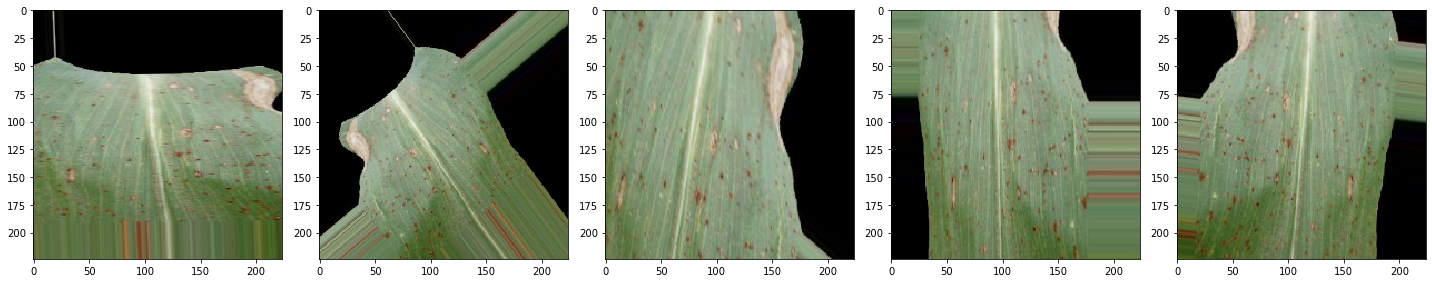

In [13]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

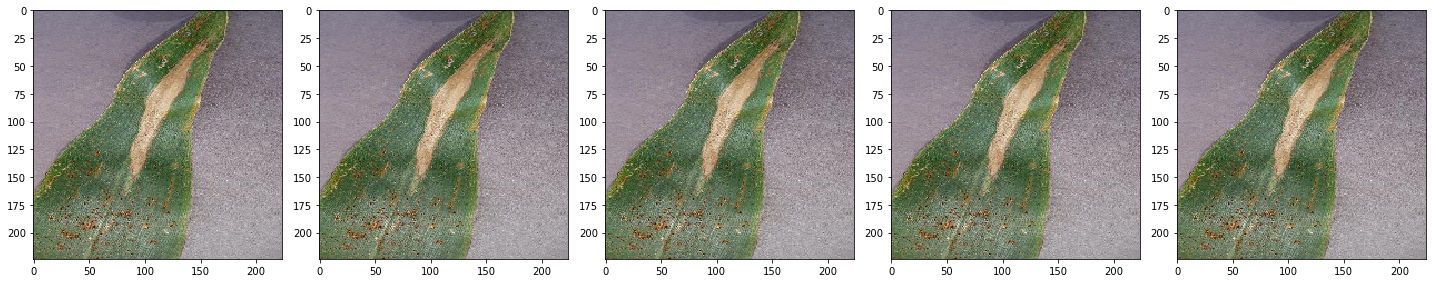

In [14]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [15]:
# Model

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [16]:
EPOCHS=10
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)


Epoch 1/10
42/42 [==============================] - 25s 588ms/step - loss: 0.9994 - accuracy: 0.6049 - val_loss: 0.6574 - val_accuracy: 0.6916
Epoch 2/10
42/42 [==============================] - 23s 559ms/step - loss: 0.6143 - accuracy: 0.8028 - val_loss: 0.9771 - val_accuracy: 0.6557
Epoch 3/10
42/42 [==============================] - 23s 557ms/step - loss: 0.5885 - accuracy: 0.8021 - val_loss: 0.3771 - val_accuracy: 0.8862
Epoch 4/10
42/42 [==============================] - 24s 574ms/step - loss: 0.4081 - accuracy: 0.8701 - val_loss: 0.3109 - val_accuracy: 0.8802
Epoch 5/10
42/42 [==============================] - 24s 578ms/step - loss: 0.3460 - accuracy: 0.8842 - val_loss: 0.3618 - val_accuracy: 0.8653
Epoch 6/10
42/42 [==============================] - 23s 558ms/step - loss: 0.4142 - accuracy: 0.8671 - val_loss: 0.3498 - val_accuracy: 0.8683
Epoch 7/10
42/42 [==============================] - 24s 569ms/step - loss: 0.3371 - accuracy: 0.8842 - val_loss: 0.2625 - val_accuracy: 0.9072

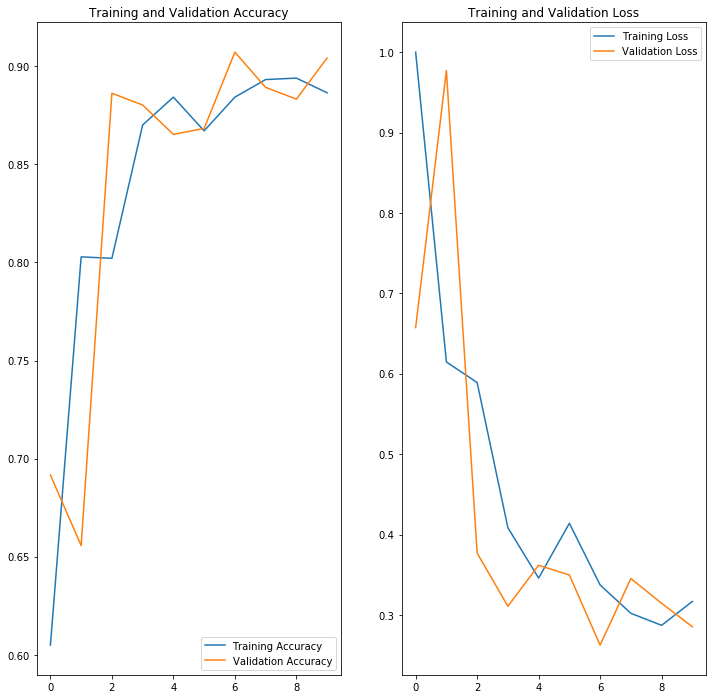

In [17]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()




In [18]:
# Save the model TFLite
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


In [19]:
# Model optmization and conversion 
#@title Select mode of optimization
mode = "Default" #@param ["Default", "Storage", "Speed"]

if mode == 'Storage':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
  optimization = tf.lite.Optimize.DEFAULT
  
optimization

<Optimize.DEFAULT: 'DEFAULT'>

In [20]:
# Convert saved model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [21]:
# Save the converted model tflite file
tflite_model_file = 'model.tflite'

with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

with open('labels.txt', 'w') as f:
  f.write('\n'.join(CLASS_NAMES))

!ls

Cats_vs_Dogs_with_Data_Augmentation.ipynb
Cats_vs_Dogs_Without_Data_Augmentation.ipynb
Celsius_to_Fahrenheit.ipynb
Classifying_Images_of_Clothing.ipynb
dickens-project-modelling.ipynb
Getting_Started_with_TensorBoard_dev.ipynb
Image_Classification_with_CNNs_edite.ipynb
Image_Classification_with_CNNs.ipynb
Introduction_to_Colab_and_Python.ipynb
l05c03_exercise_flowers_with_data_augmentation.ipynb
l06c02_exercise_flowers_with_transfer_learning.ipynb
l06c03_exercise_flowers_with_transfer_learning_solution.ipynb
l07c01_saving_and_loading_models.ipynb
l08c01_common_patterns.ipynb
l08c02_naive_forecasting.ipynb
l08c03_moving_average.ipynb
l08c04_time_windows.ipynb
l08c05_forecasting_with_machine__learning.ipynb
l08c06_forecasting_with_rnn.ipynb
l08c07_forecasting_with_stateful_rnn.ipynb
l08c08_forecasting_with_lstm.ipynb
l08c09_forecasting_with_cnn.ipynb
labels.txt
model.tflite
pandas-in-ten-minutes.py
regression.ipynb
saved_model
tflite_c01_linear_regression.ipynb
tflite_c02_transfer_learni

In [22]:
# Test the TFLITE model
interpretor = tf.lite.Interpreter(model_content=tflite_model)
interpretor.allocate_tensors()

#details
input_index = interpretor.get_input_details()[0]["index"]
output_index = interpretor.get_output_details()[0]["index"]

In [23]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  return parts[-2] == CLASS_NAMES

def decode_img(img):
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [24]:
test_batches = tf.data.Dataset.list_files(str(data_dir/'train/*/*'))

test_batches = test_batches.map(process_path).batch(1).prefetch(1)

for img, label in test_batches.take(15):
  interpretor.set_tensor(input_index, img)
  interpretor.invoke()
  predict = interpretor.get_tensor(output_index)
  print("Predicted: {} - {:2.0f}% : True: {}".format(CLASS_NAMES[np.argmax(predict)],
                                                     100*np.max(predict),
                                                     CLASS_NAMES[label[0].numpy()==1]))


Predicted: Gray Leaf Spot - 100% : True: ['Gray Leaf Spot']
Predicted: Healthy - 100% : True: ['Healthy']
Predicted: Gray Leaf Spot - 100% : True: ['Gray Leaf Spot']
Predicted: Gray Leaf Spot - 100% : True: ['Gray Leaf Spot']
Predicted: Northern Leaf Blight - 50% : True: ['Northern Leaf Blight']
Predicted: Northern Leaf Blight - 96% : True: ['Northern Leaf Blight']
Predicted: Gray Leaf Spot - 100% : True: ['Gray Leaf Spot']
Predicted: Gray Leaf Spot - 100% : True: ['Gray Leaf Spot']
Predicted: Gray Leaf Spot - 100% : True: ['Gray Leaf Spot']
Predicted: Healthy - 99% : True: ['Healthy']
Predicted: Gray Leaf Spot - 100% : True: ['Gray Leaf Spot']
Predicted: Northern Leaf Blight - 99% : True: ['Northern Leaf Blight']
Predicted: Gray Leaf Spot - 100% : True: ['Gray Leaf Spot']
Predicted: Northern Leaf Blight - 97% : True: ['Northern Leaf Blight']
Predicted: Northern Leaf Blight - 86% : True: ['Healthy']


In [25]:
from PIL import Image

for index, (image, label) in enumerate(test_batches.take(5)):
  image = tf.cast(image * 255.0, tf.uint8)
  image = tf.squeeze(image).numpy()
  pil_image = Image.fromarray(image)
  pil_image.save('{}/test_images/{}_{}.jpg'.format(data_dir,CLASS_NAMES[label[0].numpy()==1][0].lower(), index))